In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Butterworth Low Pass Filter

In [3]:
def butterworth_lowpass_filter(image, order, cutoff_frequency):
    height, width = image.shape
    butterworth_filter = np.zeros((height,width), dtype = np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height/2)**2 + (v -  width/2)**2)
            butterworth_filter[u,v] = 1 / (1 + (D / cutoff_frequency) ** (2*order))
    
    filtered_image = image * butterworth_filter
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_image))

    return np.abs(filtered_image)

# Gaussian Low Pass Filter

In [4]:
def gaussian_lowpass_filter(image, cutoff_frequency):
    height, width = image.shape
    gaussian_filter = np.zeros((height,width), dtype=np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2)**2 + (v - width / 2) ** 2)
            gaussian_filter[u,v] = np.exp(-(D ** 2) / (2 * (cutoff_frequency**2)))
    
    filtered_image = image * gaussian_filter
    filtered_image = np.fft.ifft2(np.fft.fftshift(filtered_image))

    return np.abs(filtered_image)

# Load Image

<function matplotlib.pyplot.show(close=None, block=None)>

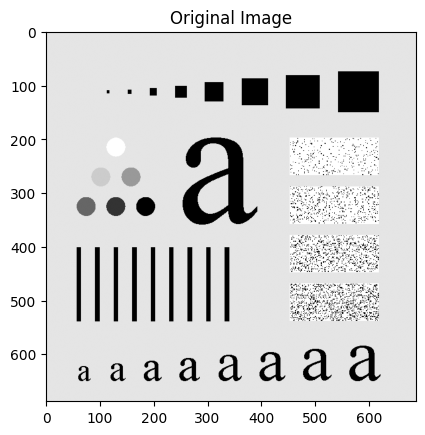

In [5]:
image = cv2.imread('Characters_Test_Pattern.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show

# Add Gaussian Noise to Image

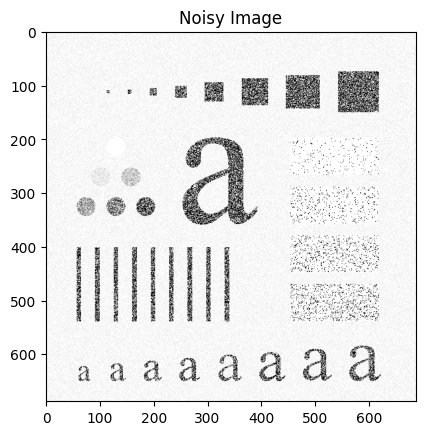

In [22]:
gaussian_noise = np.random.normal(5, 20, image.shape).astype(np.uint8)
noisy_image = cv2.add(image,gaussian_noise)

plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.show()

# Apply FFT to Image

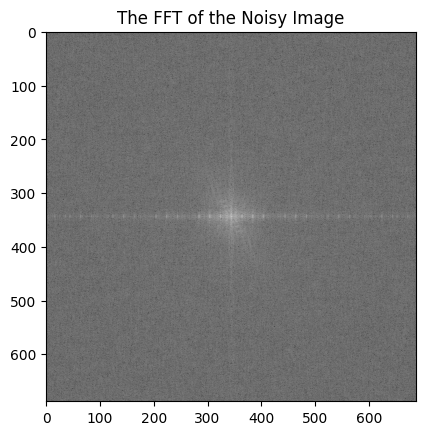

In [23]:
noisy_image_fft = np.fft.fftshift(np.fft.fft2(noisy_image))
plt.imshow(np.log(np.abs(noisy_image_fft)), cmap='gray')
plt.title('The FFT of the Noisy Image')
plt.show()

# Add Butterworth Lowpass Filter

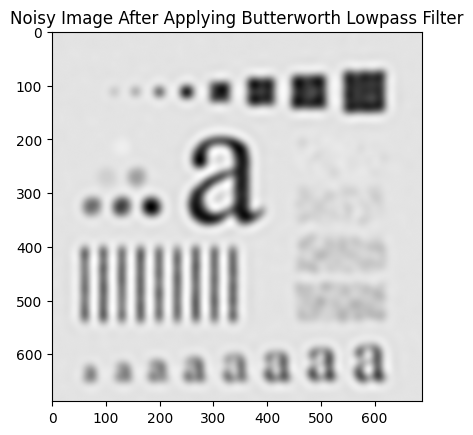

In [24]:
butterworth_lowpass_filtered_image = butterworth_lowpass_filter(noisy_image_fft, 4, 25)
plt.imshow(butterworth_lowpass_filtered_image, cmap='gray')
plt.title('Noisy Image After Applying Butterworth Lowpass Filter')
plt.show()

# Apply Gaussian Lowpass Filter

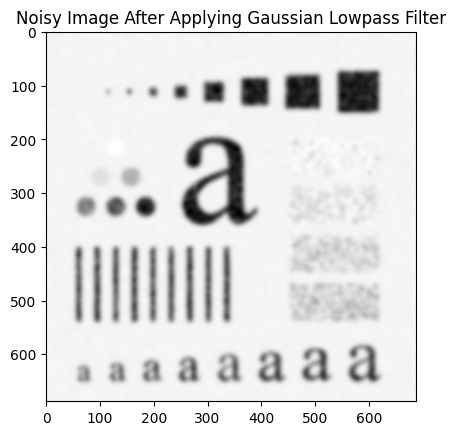

In [25]:
gaussian_lowpass_filtered_image = gaussian_lowpass_filter(noisy_image_fft, 25)
plt.imshow(gaussian_lowpass_filtered_image, cmap='gray')
plt.title('Noisy Image After Applying Gaussian Lowpass Filter')
plt.show()